In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy.optimize import brentq
%matplotlib inline

# Задание 1.

Дана система уравнений $Ax=b$. Найти решение системы с помощью *метода Гаусса*.

Выполнить 10 итераций по *методу Зейделя*. Принимая решение, полученное с помощью метода Гаусса за точное, найти
величину абсолютной погрешности итерационного решения.

*  Задать матрицу системы $A$ и вектор правой части $b$. Используя встроенную функцию найти решение системы $Ax=b$ с помощью *метода Гаусса*.

In [40]:
A = np.array(
              [[39.6, 0, 17.5, 9.9, 12],
              [79.2, 120, 0, 39.6, 0],
              [19.8, -21, 46, 0, 5],
              [49.5, 19, 19, 89.1, 0],
              [9.9, 25, 10, -39.6, 85]]
            )

b = np.array(
              [38.5, 38.8, 93.7, 43, -49.7]
            ).reshape(-1, 1)

In [41]:
def draw_matrix(a, ax):
    
    res = ax.imshow(np.array(a), cmap=plt.cm.Pastel1_r, 
                    interpolation='nearest')

    width, height = a.shape

    for x in range(width):
        for y in range(height):
            ax.annotate(str(a[x, y])[:5], xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')

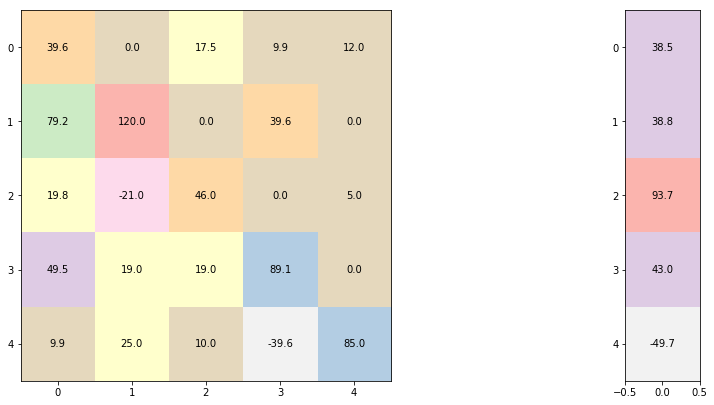

In [43]:
fig = plt.figure(figsize=(15, 15))

#show matrix A
ax = fig.add_subplot(221)

draw_matrix(A, ax)

# show b vector      
ax = fig.add_subplot(222)

draw_matrix(b, ax)

В качестве встроенной функции будем использовать  ``` numpy.linalg.solve ```. <br>
[Описание метода](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html)

In [46]:
x_true = np.linalg.solve(A, b)
print(x_true)

[[ 0.44444444]
 [ 0.1       ]
 [ 2.        ]
 [-0.21212121]
 [-1.        ]]


* Преобразовать систему $Ax=b$ к виду $x=Bx+c$, удобному для итераций. **Проверить выполнение достаточного
условия сходимости итерационных методов $||B||_{\infty} < 1$.**

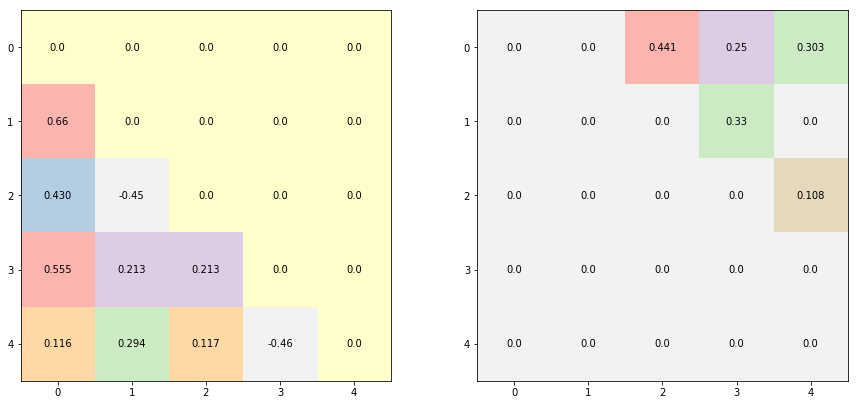

In [106]:
c = np.zeros_like(b)
B1 = np.zeros((5, 5))
B2 = np.zeros((5, 5))
for i in range(A.shape[0]):
    B1[i, :i] = A[i, :i] / A[i, i]
    B2[i, i+1:] += A[i, i + 1:] / A[i, i]
    c[i] = b[i] / A[i, i]

fig = plt.figure(figsize=(15, 15))

#show matrix B1 
ax = fig.add_subplot(221)

draw_matrix(B1, ax)

# show matrix B2      
ax = fig.add_subplot(222)

draw_matrix(B2, ax)

In [107]:
np.linalg.norm(B1+B2, ord=np.inf)

0.9956521739130435

* Используя функцию, реализующую *метод Гаусса-Зейделя*, выполнить 10 итераций по методу Зейделя; 

  Взять любое начальное приближение. Принимая решение, полученное в п. 1 за точное, найти величину абсолютной
  погрешности итерационного решения (использовать норму $||\cdot||\infty$).

*  Взять другое начальное приближение. **Объяснить полученные результаты.**

# Задание 2.
Для системы уравнений $Ax=b$ из задачи 1 найти решение по *методу Зейделя* с точностью $\varepsilon = 10^{-6}$, взяв любое начальное приближение. Подсчитать количество итераций до сходимости.